Getting started with neural networks: Classification and regression

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
len(train_data[0])

218

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to text

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[10]])

1654784/1641221 [==============================] - 0s 0us/step


In [9]:
List = []
for n in range(100):
  decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?")
    for i in train_data[n]])
  List.append((n,decoded_review))

In [10]:
List

[(0,
  "? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

Preparing the data
Encoding the integer sequences via mu

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Model definition

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [15]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5415 - accuracy: 0.7649 - val_loss: 0.4163 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3341 - accuracy: 0.8991 - val_loss: 0.3244 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2406 - accuracy: 0.9268 - val_loss: 0.2827 - val_accuracy: 0.8934
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1890 - accuracy: 0.9391 - val_loss: 0.2795 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1547 - accuracy: 0.9517 - val_loss: 0.2863 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1270 - accuracy: 0.9625 - val_loss: 0.2919 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1061 - accuracy: 0.9689 - val_loss: 0.3110 - val_accuracy: 0.8825
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

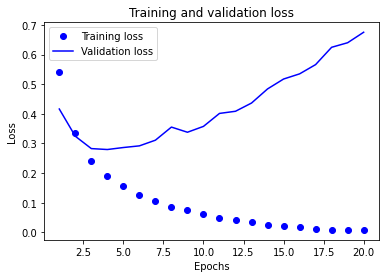

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

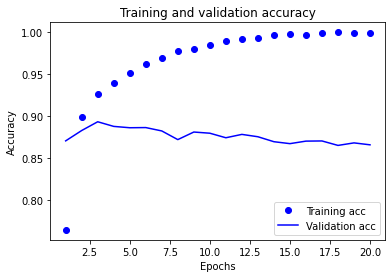

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Retraining a model from scratch

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4813 - accuracy: 0.8085
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2770 - accuracy: 0.9062
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2109 - accuracy: 0.9270
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2861 - accuracy: 0.8866


[0.28611165285110474, 0.8866000175476074]

Using a trained model to generate predictions on new data

In [25]:
model.predict(x_test)

array([[0.1965065 ],
       [0.99864674],
       [0.8870089 ],
       ...,
       [0.12802398],
       [0.0785462 ],
       [0.65075207]], dtype=float32)

Classifying newswires: A multiclass classification example

In [26]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [27]:
len(train_data)

8982

In [28]:
len(test_data)

2246

In [29]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decoding newswires back to text

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

train_labels[10]

3

Preparing the data
Encoding the input data

In [32]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Encoding the labels

In [36]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [34]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Building your model
  Model definition

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

Compiling the model

In [38]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

Validating your approach

In [39]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.6522 - accuracy: 0.5358 - val_loss: 1.7840 - val_accuracy: 0.6700
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4297 - accuracy: 0.7174 - val_loss: 1.3009 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0523 - accuracy: 0.7786 - val_loss: 1.1215 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8277 - accuracy: 0.8287 - val_loss: 1.0259 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6654 - accuracy: 0.8629 - val_loss: 0.9547 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5337 - accuracy: 0.8916 - val_loss: 1.0059 - val_accuracy: 0.7680
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4349 - accuracy: 0.9108 - val_loss: 0.9036 - val_accuracy: 0.8070
Epoch 8/20
16

Plotting the training and validation loss

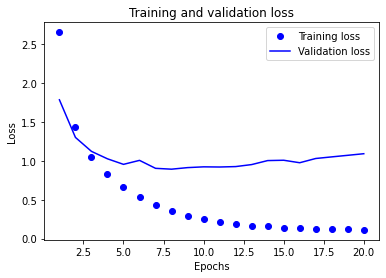

In [41]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy



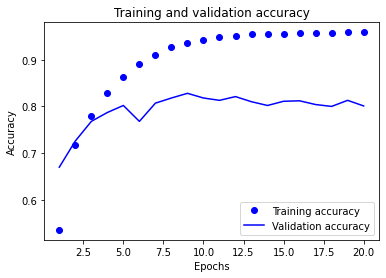

In [42]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [44]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/9
18/18 [==============================] - 1s 50ms/step - loss: 2.4488 - accuracy: 0.5606
Epoch 2/9
18/18 [==============================] - 1s 50ms/step - loss: 1.3205 - accuracy: 0.7241
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 0.9866 - accuracy: 0.7877
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7685 - accuracy: 0.8332
Epoch 5/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6068 - accuracy: 0.8702
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4793 - accuracy: 0.8987
Epoch 7/9
18/18 [==============================] - 1s 48ms/step - loss: 0.3826 - accuracy: 0.9205
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.3137 - accuracy: 0.9312
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9208 - accuracy: 0.8005


[0.9208171367645264, 0.8005343079566956]

In [45]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18788958147818344

Generating predictions on new data

In [46]:
predictions = model.predict(x_test)

In [47]:
predictions[0].shape

(46,)

In [48]:
np.sum(predictions[0])

1.0

In [49]:
np.argmax(predictions[0])

3

A different way to handle the labels and the loss

In [50]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


In [51]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

A model with an information bottleneck

In [52]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 22ms/step - loss: 3.1551 - accuracy: 0.2650 - val_loss: 2.5492 - val_accuracy: 0.3720
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2.1395 - accuracy: 0.4320 - val_loss: 1.8917 - val_accuracy: 0.4650
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 1.5521 - accuracy: 0.6364 - val_loss: 1.5073 - val_accuracy: 0.6460
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.2498 - accuracy: 0.6911 - val_loss: 1.3929 - val_accuracy: 0.6750
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1019 - accuracy: 0.7212 - val_loss: 1.3532 - val_accuracy: 0.6790
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9933 - accuracy: 0.7430 - val_loss: 1.3405 - val_accuracy: 0.6910
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9042 - accuracy: 0.7582 - val_loss: 1.3387 - val_accuracy: 0.6960
Epoch 8/20
63

Further experiments

Wrapping up

Predicting house prices: A regression example

The Boston Housing Price dataset

Loading the Boston housing dataset

In [53]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


65536/57026 [==================================] - 0s 0us/step


In [54]:
train_data.shape

(404, 13)

In [55]:
test_data.shape

(102, 13)

In [56]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Preparing the data
Normalizing the data

In [57]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Building your model
Model definition

In [58]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

Validating your approach using K-fold validation

In [59]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [60]:
all_scores

[1.9039573669433594,
 2.3814141750335693,
 2.4214117527008057,
 2.3880069255828857]

In [61]:
np.mean(all_scores)

2.273697555065155

Saving the validation logs at each fold

In [62]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Building the history of successive mean K-fold validation scores

In [63]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

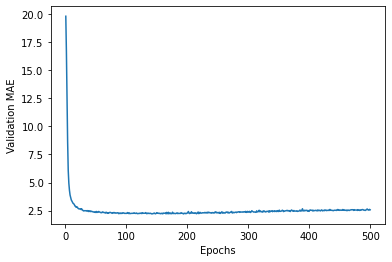

In [64]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Plotting validation scores, excluding the first 10 data points

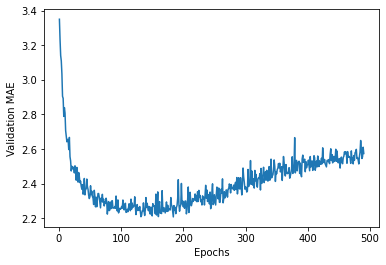

In [65]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Training the final model

In [66]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.9936 - mae: 2.5317


In [67]:
test_mae_score

2.531651735305786

Generating predictions on new data

In [68]:
predictions = model.predict(test_data)
predictions[0]

array([8.620919], dtype=float32)